In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('troop_movements.csv')
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'

encoded_data = pd.get_dummies(data)
feature_names = encoded_data.columns
homeworld_columns = [feature for feature in feature_names if feature.startswith('homeworld')]
unit_columns = [feature for feature in feature_names if feature.startswith('unit_type')]
x_columns = homeworld_columns + unit_columns


X = encoded_data[x_columns]

y = data['is_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {accuracy_score}')

accuracy_score: 0.47333333333333333


In [23]:
import seaborn as sns

importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature' : X.columns,'Importance':importances})

display(feature_importances)

,Feature,Importance
0,homeworld_Alderaan,0.016437
1,homeworld_Aleen Minor,0.011367
2,homeworld_Bestine IV,0.007051
3,homeworld_Cerea,0.011938
4,homeworld_Champala,0.014213
5,homeworld_Chandrila,0.018699
6,homeworld_Concord Dawn,0.015920
7,homeworld_Corellia,0.012786
8,homeworld_Dagobah,0.028862
9,homeworld_Dathomir,0.017527


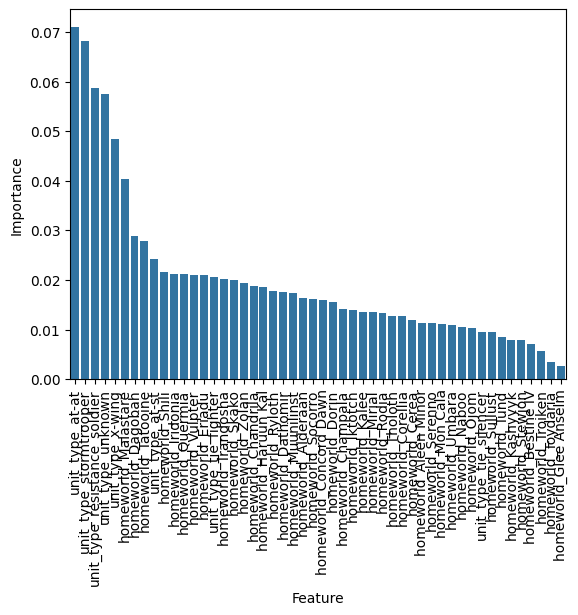

In [26]:
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
sns.barplot(x="Feature", y="Importance", data=sorted_importances)
plt.xticks(rotation=90)
plt.show()